# 階層的クラスタリング

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

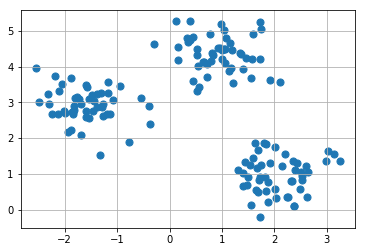

In [6]:
from sklearn.datasets import make_blobs  # ダミーデータの生成用

# Xには1つのプロットの(x,y)が、yにはそのプロットの所属するクラスター番号が入る
X, y = make_blobs(n_samples=150,         # サンプル点の総数
               n_features=2,          # 特徴量（次元数）の指定  default:2 
               centers=3,             # クラスタの個数
               cluster_std=0.5,       # クラスタ内の標準偏差 
               shuffle=True,          # サンプルをシャッフル
               random_state=0)        # 乱数生成器の状態を指定

plt.scatter(X[:, 0], X[:, 1], marker='o', s=50)
plt.grid()
plt.show()

In [18]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,            # クラスターの個数
            init='random',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
            n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
            max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
            tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
            random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態

y_km = km.fit_predict(X)

for y1, y2 in zip(y_km, y):
    if y1 != y2:
        print("have miss judge")

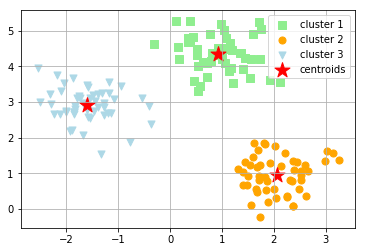

In [8]:
plt.scatter(X[y_km==0, 0],         # y_km（クラスター番号）が0の時にXの0列目を抽出
                        X[y_km==0, 1], # y_km（クラスター番号）が0の時にXの1列目を抽出
                        s=50,
                        c='lightgreen',
                        marker='s',
                        label='cluster 1')
plt.scatter(X[y_km==1,0],
                    X[y_km==1,1],
                    s=50,
                    c='orange',
                    marker='o',
                    label='cluster 2')
plt.scatter(X[y_km==2,0],
                   X[y_km==2,1],
                    s=50,
                    c='lightblue',
                    marker='v',
                    label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],   # km.cluster_centers_には各クラスターのセントロイドの座標が入っている
                    km.cluster_centers_[:,1],
                    s=250,
                    marker='*',
                    c='red',
                    label='centroids')
plt.legend()
plt.grid()
plt.show()

[0.75956181 0.43233677 0.7747553  0.72286402 0.76729229 0.72280273
 0.69484791 0.76101499 0.77303671 0.67320272 0.62375802 0.40348569
 0.80092777 0.73225118 0.59884632 0.78954087 0.75955598 0.81572606
 0.79897477 0.7936958  0.72221435 0.76384238 0.72671597 0.73219594
 0.74183186 0.81463826 0.76045682 0.62065362 0.57912988 0.76929277
 0.707709   0.8045906  0.7116979  0.78561661 0.66997314 0.65285806
 0.68519649 0.77015391 0.72638012 0.77905009 0.56028722 0.70806176
 0.66201873 0.77669657 0.79206045 0.79499104 0.67874476 0.43073904
 0.72878986 0.75911278 0.61479508 0.68506268 0.76602547 0.80521304
 0.79571018 0.77872478 0.63708395 0.62515462 0.58878683 0.7767243
 0.72889549 0.40154174 0.80287718 0.78189854 0.76687374 0.35466307
 0.79135592 0.56967556 0.37334246 0.54630918 0.61918571 0.70584253
 0.79635805 0.61369253 0.74071059 0.77509834 0.7351302  0.72821908
 0.74135332 0.78854416 0.80090725 0.78961228 0.51299076 0.78719254
 0.71872541 0.6397918  0.78855017 0.78917529 0.7061704  0.76230

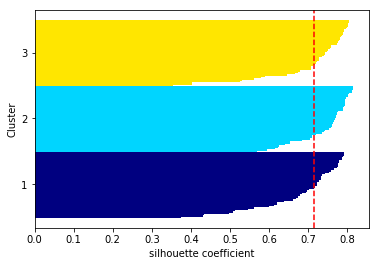

In [19]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm

cluster_labels = np.unique(y_km)       # y_kmの要素の中で重複を無くす
n_clusters=cluster_labels.shape[0]     # 配列の長さを返す。つまりここでは n_clustersで指定した3となる

# シルエット係数を計算
silhouette_vals = silhouette_samples(X,y_km,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数計算
y_ax_lower, y_ax_upper= 0,0
yticks = []

print(silhouette_vals)


for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]      # cluster_labelsには 0,1,2が入っている（enumerateなのでiにも0,1,2が入ってる（たまたま））
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)              # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        color = cm.jet(float(i)/n_clusters)               # 色の値を作る
        plt.barh(range(y_ax_lower,y_ax_upper),            # 水平の棒グラフのを描画（底辺の範囲を指定）
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        yticks.append((y_ax_lower+y_ax_upper)/2)          # クラスタラベルの表示位置を追加
        y_ax_lower += len(c_silhouette_vals)              # 底辺の値に棒の幅を追加

silhouette_avg = np.mean(silhouette_vals)                 # シルエット係数の平均値
plt.axvline(silhouette_avg,color="red",linestyle="--")    # 係数の平均値に破線を引く 
plt.yticks(yticks,cluster_labels + 1)                     # クラスタレベルを表示
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
plt.show()